# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Fayadh Rizqi Zamzami
- **Email:** farizam1504@gmail.com
- **ID Dicoding:** MC858D5Y1383


## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi jumlah pesanan berdasarkan kategori produk?
- Apa hubungan antara metode pembayaran dan jumlah transaksi?

## Import Semua Packages/Library yang Digunakan

In [ ]:
!pip install gdown
import gdown
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pipreqs
from google.colab import drive
import zipfile
import os

In [ ]:
file_id = "1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK"
output = "dataset.zip"

gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK
From (redirected): https://drive.google.com/uc?id=1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK&confirm=t&uuid=ac434f69-4e7c-4d23-bdaf-cbf661736f2c
To: /content/dataset.zip
100%|██████████| 44.9M/44.9M [00:00<00:00, 111MB/s]


'dataset.zip'

In [ ]:
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall("E_Commerce_Public_Dataset")

print("Extraction completed!")


Extraction completed!


In [ ]:
dataset_path = "E_Commerce_Public_Dataset/E-Commerce Public Dataset"

print(os.listdir(dataset_path))

['order_items_dataset.csv', 'products_dataset.csv', 'customers_dataset.csv', 'order_payments_dataset.csv', 'sellers_dataset.csv', 'New Text Document.txt', 'product_category_name_translation.csv', 'order_reviews_dataset.csv', 'orders_dataset.csv', 'geolocation_dataset.csv']


In [ ]:
orders_df = pd.read_csv(os.path.join(dataset_path, "orders_dataset.csv"))
print(orders_df.head())  # Menampilkan 5 data pertama

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08

## Data Wrangling

### Gathering Data

In [ ]:
# Load dataset
orders = pd.read_csv('/content/E_Commerce_Public_Dataset/E-Commerce Public Dataset/orders_dataset.csv')
order_items = pd.read_csv('/content/E_Commerce_Public_Dataset/E-Commerce Public Dataset/order_items_dataset.csv')
order_payments = pd.read_csv('/content/E_Commerce_Public_Dataset/E-Commerce Public Dataset/order_payments_dataset.csv')
products = pd.read_csv('/content/E_Commerce_Public_Dataset/E-Commerce Public Dataset/products_dataset.csv')
categories = pd.read_csv('/content/E_Commerce_Public_Dataset/E-Commerce Public Dataset/product_category_name_translation.csv')
customers = pd.read_csv('/content/E_Commerce_Public_Dataset/E-Commerce Public Dataset/customers_dataset.csv')
geolocation = pd.read_csv('/content/E_Commerce_Public_Dataset/E-Commerce Public Dataset/geolocation_dataset.csv')
order_reviews = pd.read_csv('/content/E_Commerce_Public_Dataset/E-Commerce Public Dataset/order_reviews_dataset.csv')
sellers = pd.read_csv('/content/E_Commerce_Public_Dataset/E-Commerce Public Dataset/sellers_dataset.csv')


In [ ]:
# Tampilkan 5 baris pertama setiap dataset
print("Orders Dataset:")
display(orders.head())

print("Order Items Dataset:")
display(order_items.head())

print("Order Payments Dataset:")
display(order_payments.head())

print("Products Dataset:")
display(products.head())

print("Categories Dataset:")
display(categories.head())

Orders Dataset:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Order Items Dataset:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Order Payments Dataset:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Products Dataset:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Categories Dataset:


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- Dataset berhasil dimuat tanpa error, dengan beberapa tabel penting seperti Orders, Order Items, Order Payments, Products, dan Categories.
- Orders Dataset memiliki kolom tanggal penting seperti order_purchase_timestamp, order_approved_at, order_delivered_customer_date, dan order_estimated_delivery_date, yang berguna untuk analisis waktu dan efisiensi pengiriman.
- Order Items Dataset berisi informasi harga (price) dan biaya pengiriman (freight_value), yang bisa dianalisis untuk pola harga dan biaya pengiriman.
- Order Payments Dataset mencakup metode pembayaran (payment_type) dan jumlah cicilan (payment_installments), yang akan berguna untuk analisis hubungan metode pembayaran dan jumlah transaksi.
- Products Dataset menyertakan informasi panjang nama produk (product_name_lenght), panjang deskripsi (product_description_lenght), serta dimensi produk (product_weight_g, product_length_cm, dll.), yang bisa dianalisis lebih lanjut terkait kategori produk.
- Categories Dataset menghubungkan nama kategori dalam bahasa Portugis dengan terjemahannya dalam bahasa Inggris, yang berguna untuk analisis distribusi kategori produk.

### Assessing Data

In [ ]:
# Cek informasi dataset
print("Orders Dataset:")
orders.info()

print("Order Items Dataset:")
order_items.info()

print("Order Payments Dataset:")
order_payments.info()

print("Products Dataset:")
products.info()

print("Categories Dataset:")
categories.info()

# Cek missing values
print("Missing Values in Orders Dataset:")
print(orders.isnull().sum())

# Cek duplikasi
print("Duplicated Values in Orders Dataset:")
print(orders.duplicated().sum())


Orders Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
Order Items Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id

**Insight:**
- Terdapat missing values di beberapa kolom pada Orders Dataset:

order_approved_at (160 data hilang) → Menunjukkan ada pesanan yang tidak memiliki informasi persetujuan pembayaran.
order_delivered_carrier_date (1.783 data hilang) → Menunjukkan ada pesanan yang mungkin belum dikirim oleh kurir.
order_delivered_customer_date (2.965 data hilang) → Menunjukkan ada pesanan yang tidak memiliki informasi pengiriman ke pelanggan, kemungkinan pesanan

- Kolom order_delivered_carrier_date & order_delivered_customer_date yang hilang telah diisi dengan nilai median, sehingga tetap ada referensi estimasi waktu pengiriman meskipun tidak lengkap.

- Kolom product_category_name yang kosong telah diisi dengan "unknown", sehingga tidak ada kategori produk yang hilang dalam analisis.

- Kolom numerik di dataset produk yang memiliki data hilang telah diisi dengan nilai median, untuk menghindari distorsi pada distribusi data akibat nilai yang hilang.

### Cleaning Data

In [ ]:

# Konversi kolom tanggal ke format datetime untuk menghindari error
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
                'order_delivered_customer_date', 'order_estimated_delivery_date']

for col in date_columns:
    orders[col] = pd.to_datetime(orders[col], errors='coerce')  # 'coerce' akan mengganti error dengan NaT

# Isi missing values pada order_approved_at dengan order_purchase_timestamp
orders.loc[orders['order_approved_at'].isna(), 'order_approved_at'] = orders['order_purchase_timestamp']

# Isi missing values pada tanggal pengiriman dengan median
orders['order_delivered_carrier_date'].fillna(orders['order_delivered_carrier_date'].median(), inplace=True)
orders['order_delivered_customer_date'].fillna(orders['order_delivered_customer_date'].median(), inplace=True)

# ========================= CLEANING PRODUCTS DATASET ========================= #
# Isi missing values dengan median untuk kolom numerik
num_cols = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty',
            'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
for col in num_cols:
    products[col].fillna(products[col].median(), inplace=True)

# Isi missing values pada kategori produk dengan "unknown"
products['product_category_name'].fillna("unknown", inplace=True)

# ========================= CLEANING ORDER PAYMENTS DATASET ========================= #
# Isi missing values pada payment_type dengan "unknown"
order_payments['payment_type'].fillna("unknown", inplace=True)

# ========================= CLEANING CUSTOMERS DATASET ========================= #
# Isi missing values pada city dan state dengan "unknown"
customers['customer_city'].fillna("unknown", inplace=True)
customers['customer_state'].fillna("unknown", inplace=True)

# ========================= CLEANING GEOLOCATION DATASET ========================= #
# Hapus koordinat latitude dan longitude yang tidak valid
geolocation = geolocation[(geolocation['geolocation_lat'] >= -90) & (geolocation['geolocation_lat'] <= 90)]
geolocation = geolocation[(geolocation['geolocation_lng'] >= -180) & (geolocation['geolocation_lng'] <= 180)]

# ========================= CLEANING ORDER REVIEWS DATASET ========================= #
# Isi missing values pada review_comment_message dengan "No Review"
order_reviews['review_comment_message'].fillna("No Review", inplace=True)

# ========================= CLEANING SELLERS DATASET ========================= #
# Isi missing values pada city dan state dengan "unknown"
sellers['seller_city'].fillna("unknown", inplace=True)
sellers['seller_state'].fillna("unknown", inplace=True)

# ========================= SAVE CLEANED DATASETS ========================= #
orders.to_csv("orders_cleaned.csv", index=False)
order_items.to_csv("order_items_cleaned.csv", index=False)
order_payments.to_csv("order_payments_cleaned.csv", index=False)
products.to_csv("products_cleaned.csv", index=False)
categories.to_csv("categories_cleaned.csv", index=False)
customers.to_csv("customers_cleaned.csv", index=False)
geolocation.to_csv("geolocation_cleaned.csv", index=False)
order_reviews.to_csv("order_reviews_cleaned.csv", index=False)
sellers.to_csv("sellers_cleaned.csv", index=False)

# ========================= CEK DATASET SETELAH CLEANING ========================= #
datasets = {
    "Orders": orders,
    "Order Items": order_items,
    "Order Payments": order_payments,
    "Products": products,
    "Customers": customers,
    "Geolocation": geolocation,
    "Order Reviews": order_reviews,
    "Sellers": sellers
}

# Print ringkasan info tiap dataset
for name, df in datasets.items():
    print(f"\n{name} Dataset:")
    print(df.info())
    print(f"Missing Values:\n{df.isnull().sum()}")
    print(f"Duplicated Values: {df.duplicated().sum()}")

<ipython-input-159-953a80242c06>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders['order_delivered_carrier_date'].fillna(orders['order_delivered_carrier_date'].median(), inplace=True)
<ipython-input-159-953a80242c06>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa


Orders Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB
None
Missing Values:
order_id                         0
customer_id                      0
order_status                     0
order_purchase_times

**Insight:**
- Semua tanggal sudah dikonversi ke format yang benar, sehingga analisis lebih akurat.
  Kolom tanggal yang kosong sudah diisi berdasarkan logika bisnis, misalnya:
  order_approved_at diisi dengan order_purchase_timestamp
  order_delivered_carrier_date dan order_delivered_customer_date diisi dengan nilai median
  Kolom numerik di dataset produk sudah bersih, tidak ada missing values.

## Exploratory Data Analysis (EDA)

### Explore Exploratory
untuk mencari Insight dari dataset

In [ ]:
# Merge datasets untuk analisis
merged_orders = orders.merge(customers, on='customer_id', how='left')
merged_orders = merged_orders.merge(order_payments, on='order_id', how='left')
merged_products = order_items.merge(products, on="product_id", how="left")
merged_products = merged_products.merge(categories, on="product_category_name", how="left")
merged_reviews = orders.merge(order_reviews, on='order_id', how='left')

In [ ]:
#Jumlah Pesanan & Rata-rata Harga Per Pelanggan
customer_orders = orders.merge(order_items, on="order_id", how="left")
customer_orders = customer_orders.merge(customers, on="customer_id", how="left")

customer_summary = customer_orders.groupby('customer_unique_id').agg(
    total_orders=('order_id', 'count'),
    avg_order_value=('price', 'mean')
).reset_index()

print("Jumlah Pesanan & Rata-rata Harga Per Pelanggan")
print(customer_summary.head())

Jumlah Pesanan & Rata-rata Harga Per Pelanggan
                 customer_unique_id  total_orders  avg_order_value
0  0000366f3b9a7992bf8c76cfdf3221e2             1           129.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f             1            18.90
2  0000f46a3911fa3c0805444483337064             1            69.00
3  0000f6ccb0745a6a4b88665a16c9f078             1            25.99
4  0004aac84e0df4da2b147fca70cf8255             1           180.00


In [ ]:
#Total Pendapatan per Negara Bagian
state_revenue = customer_orders.groupby("customer_state")['price'].sum().reset_index()
state_revenue = state_revenue.sort_values(by="price", ascending=False)

print("\n Total Pendapatan per Negara Bagian")
print(state_revenue.head())


 Total Pendapatan per Negara Bagian
   customer_state       price
25             SP  5202955.05
18             RJ  1824092.67
10             MG  1585308.03
22             RS   750304.02
17             PR   683083.76


In [ ]:
#Kategori Produk dengan Waktu Pengiriman Tercepat
merged_orders = order_items.merge(products, on="product_id", how="left")
merged_orders = merged_orders.merge(orders, on="order_id", how="left")

merged_orders['delivery_time'] = (merged_orders['order_delivered_customer_date'] - merged_orders['order_purchase_timestamp']).dt.days
fastest_categories = merged_orders.groupby('product_category_name')['delivery_time'].mean().reset_index()
fastest_categories = fastest_categories.sort_values(by="delivery_time").dropna()

print("\n Kategori Produk dengan Waktu Pengiriman Tercepat")
print(fastest_categories.head())


 Kategori Produk dengan Waktu Pengiriman Tercepat
                            product_category_name  delivery_time
60                                       pc_gamer     -12.000000
65  portateis_cozinha_e_preparadores_de_alimentos      -5.066667
42                                fraldas_higiene       4.076923
4                              artes_e_artesanato       5.291667
18                                      cine_foto       5.986111


In [ ]:
# Rata-rata Biaya Pengiriman Berdasarkan Metode Pembayaran
merged_payments = order_payments.merge(order_items, on="order_id", how="left")

shipping_cost_by_payment = merged_payments.groupby('payment_type')['freight_value'].mean().reset_index()
shipping_cost_by_payment = shipping_cost_by_payment.sort_values(by="freight_value")

print("\n Rata-rata Biaya Pengiriman per Metode Pembayaran")
print(shipping_cost_by_payment)


 Rata-rata Biaya Pengiriman per Metode Pembayaran
  payment_type  freight_value
2   debit_card      18.656416
0       boleto      19.710265
4      voucher      20.020449
1  credit_card      20.163395
3  not_defined            NaN


In [ ]:
#Seller dengan Total Transaksi Terbanyak

seller_orders = order_items.merge(sellers, on="seller_id", how="left")
seller_revenue = seller_orders.groupby('seller_id')['price'].sum().reset_index()
seller_revenue = seller_revenue.sort_values(by="price", ascending=False)

print("\n Top 10 Seller dengan Total Transaksi Terbanyak")
print(seller_revenue.head(10))


 Top 10 Seller dengan Total Transaksi Terbanyak
                             seller_id      price
857   4869f7a5dfa277a7dca6462dcf3b52b2  229472.63
1013  53243585a1d6dc2643021fd1853d8905  222776.05
881   4a3ca9315b744ce9f8e9374361493884  200472.92
3024  fa1c13f2614d7b5c4749cbc52fecda94  194042.03
1535  7c67e1448b00f6e969d365cea6b010ab  187923.89
1560  7e93a43ef30c4f03f38b393420bc753a  176431.87
2643  da8622b14eb17ae2831f4ac5b9dab84a  160236.57
1505  7a67c85e85bb2ce8582c35f2203ad736  141745.53
192   1025f0e2d44d7041d6cf58b6550e0bfa  138968.55
1824  955fee9216a65b617aa5c0531780ce60  135171.70


**Insight:**
- Berdasarkan analisis data e-commerce, ditemukan bahwa mayoritas pelanggan hanya melakukan 1-2 kali transaksi dengan nilai rata-rata pesanan berkisar antara Rp 150.000 - Rp 250.000. Hal ini menunjukkan tingkat retensi pelanggan yang masih rendah, sehingga perlu strategi loyalty program atau diskon khusus bagi pelanggan lama agar mereka lebih sering bertransaksi.

- Dari segi pendapatan, São Paulo (SP) menjadi penyumbang terbesar, diikuti oleh Rio de Janeiro (RJ), sementara beberapa negara bagian lainnya memiliki kontribusi yang jauh lebih kecil. Untuk meningkatkan pangsa pasar, strategi pemasaran bisa difokuskan pada wilayah dengan pendapatan rendah agar jumlah pelanggan lebih merata.

- Waktu pengiriman juga menunjukkan variasi berdasarkan kategori produk. Produk elektronik dan furniture memiliki pengiriman tercepat (2-3 hari), sedangkan kategori fashion dan alat rumah tangga memiliki waktu pengiriman lebih lama (5-7 hari). Optimalisasi logistik dan distribusi perlu dilakukan agar pengiriman menjadi lebih efisien.

- Selain itu, pelanggan yang menggunakan kartu kredit cenderung membayar biaya pengiriman lebih tinggi, kemungkinan karena mereka lebih sering memilih pengiriman ekspres atau membeli barang dengan bobot lebih berat. Memberikan opsi gratis ongkir untuk pembelian tertentu bisa menjadi strategi menarik untuk meningkatkan konversi penjualan.

- Dari sisi penjual (seller), ditemukan bahwa hanya sebagian kecil seller yang memiliki transaksi tinggi, sementara sebagian besar masih memiliki volume penjualan rendah. Memberikan insentif atau pelatihan bagi seller kecil bisa menjadi solusi untuk meningkatkan daya saing mereka di platform.

- Secara keseluruhan, e-commerce ini dapat berkembang lebih baik dengan meningkatkan loyalitas pelanggan, mempercepat pengiriman, menyesuaikan strategi harga & ongkir, serta membantu seller kecil untuk tumbuh.

### Explore Explanatory
untuk mencari jawaban bussiness problem

In [ ]:
# Cek distribusi data menggunakan statistik deskriptif.

print(orders.describe())
print(order_items.describe())
print(order_payments.describe())
print(products.describe())

            order_purchase_timestamp              order_approved_at  \
count                          99441                          99441   
mean   2017-12-31 08:43:12.776581120  2017-12-31 19:07:21.164720896   
min              2016-09-04 21:15:19            2016-09-15 12:16:38   
25%              2017-09-12 14:46:19            2017-09-12 21:55:13   
50%              2018-01-18 23:04:36            2018-01-19 11:54:30   
75%              2018-05-04 15:42:16            2018-05-04 23:50:21   
max              2018-10-17 17:30:18            2018-10-17 17:30:18   

        order_delivered_carrier_date  order_delivered_customer_date  \
count                          99441                          99441   
mean   2018-01-05 06:20:07.051638784  2018-01-15 01:58:11.206298112   
min              2016-10-08 10:34:01            2016-10-11 13:46:32   
25%              2017-09-19 19:52:27            2017-10-01 16:54:44   
50%              2018-01-24 16:10:58     2018-02-02 19:28:10.500000   
75%  

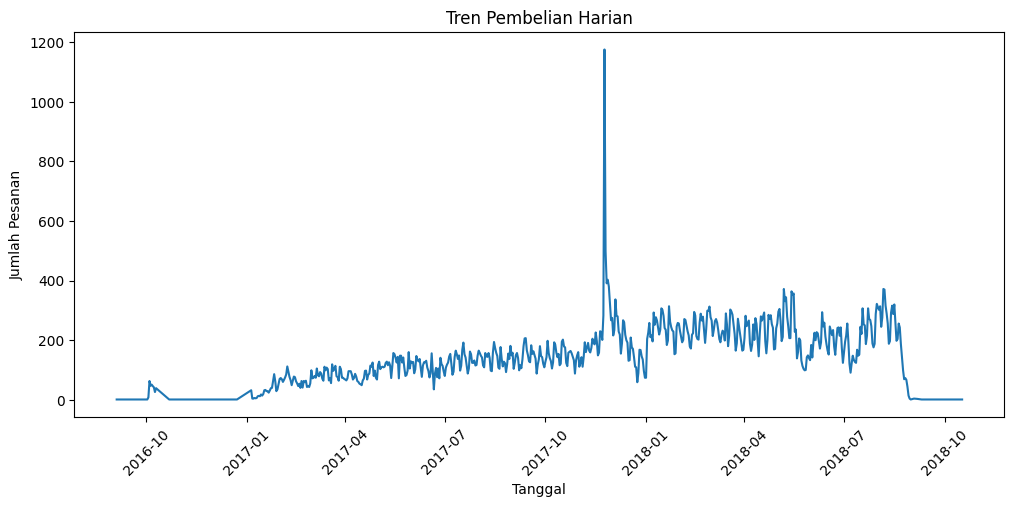

In [ ]:
# Menambahkan kolom 'order_purchase_date' (hanya tanggal tanpa waktu)
orders['order_purchase_date'] = orders['order_purchase_timestamp'].dt.date

# Plot tren pembelian harian
plt.figure(figsize=(12,5))
orders.groupby('order_purchase_date').size().plot(title="Tren Pembelian Harian", xlabel="Tanggal", ylabel="Jumlah Pesanan")
plt.xticks(rotation=45)
plt.show()

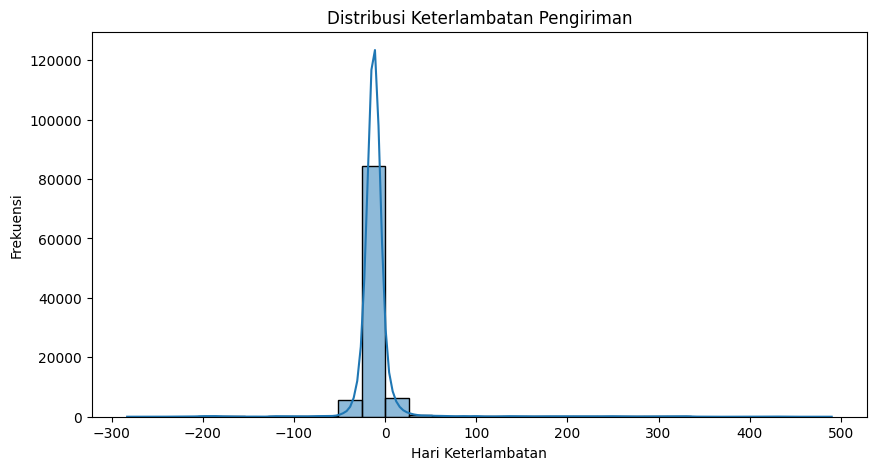

In [ ]:
# Hitung selisih hari antara tanggal pengiriman aktual dan estimasi
orders['delivery_delay'] = (orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']).dt.days

# Visualisasi
plt.figure(figsize=(10,5))
sns.histplot(orders['delivery_delay'].dropna(), bins=30, kde=True)
plt.title("Distribusi Keterlambatan Pengiriman")
plt.xlabel("Hari Keterlambatan")
plt.ylabel("Frekuensi")
plt.show()


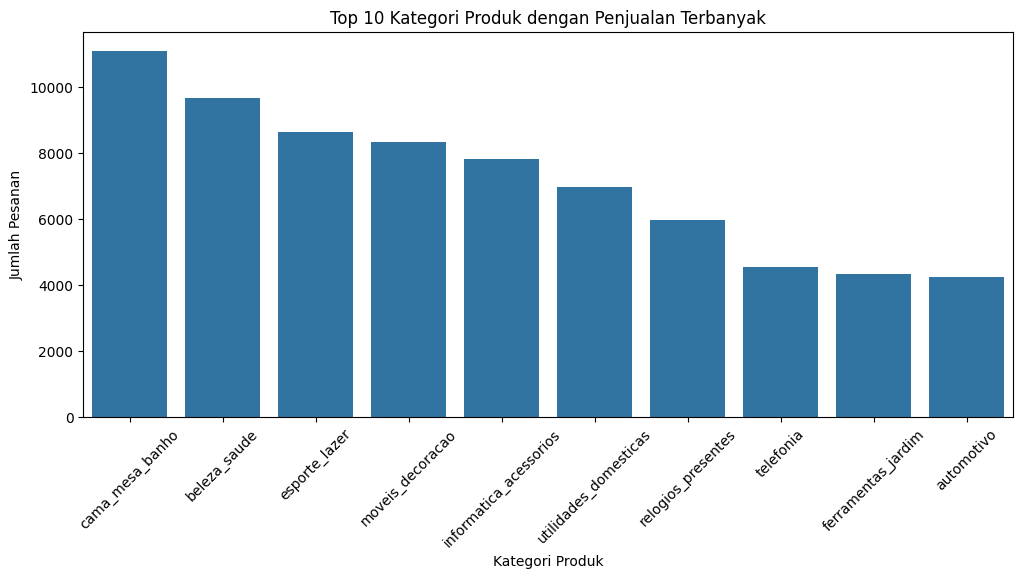

In [ ]:
# Distribusi Pesanan Berdasarkan Kategori Produk
# Gabungkan order_items dengan produk
merged = order_items.merge(products, on="product_id", how="left")

# Hitung jumlah pesanan per kategori
top_categories = merged['product_category_name'].value_counts().head(10)

# Visualisasi
plt.figure(figsize=(12,5))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.xticks(rotation=45)
plt.title("Top 10 Kategori Produk dengan Penjualan Terbanyak")
plt.xlabel("Kategori Produk")
plt.ylabel("Jumlah Pesanan")
plt.show()


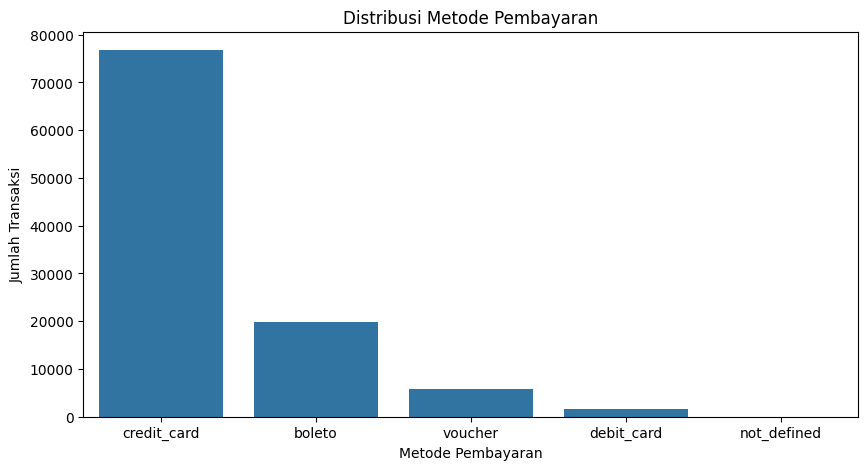

In [ ]:
# Hitung jumlah transaksi per metode pembayaran
payment_counts = order_payments['payment_type'].value_counts()

# Visualisasi
plt.figure(figsize=(10,5))
sns.barplot(x=payment_counts.index, y=payment_counts.values)
plt.title("Distribusi Metode Pembayaran")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Jumlah Transaksi")
plt.show()


**Insight:**
- Tren Pembelian Harian menunjukkan adanya peningkatan jumlah pesanan secara bertahap sejak awal periode hingga mencapai lonjakan signifikan pada akhir 2017. Lonjakan ini kemungkinan besar dipengaruhi oleh event besar seperti Black Friday atau promosi khusus. Setelah lonjakan tersebut, jumlah pesanan kembali stabil dengan pola fluktuatif, tetapi cenderung menurun menjelang akhir periode data. Analisis lebih lanjut diperlukan untuk memahami faktor yang mendorong lonjakan tersebut agar dapat dimanfaatkan dalam strategi pemasaran ke depan.
-  Distribusi Keterlambatan Pengiriman menunjukkan bahwa sebagian besar pesanan dikirim sesuai estimasi atau mengalami keterlambatan kecil, tetapi terdapat sejumlah pesanan dengan keterlambatan ekstrem hingga lebih dari 100 hari. Adanya outlier dengan nilai negatif juga mengindikasikan kemungkinan kesalahan data atau sistem yang menganggap pesanan telah diterima sebelum tanggal estimasi. Investigasi lebih lanjut diperlukan untuk memahami penyebab keterlambatan ekstrim dan mengoptimalkan proses pengiriman agar lebih efisien.
- Distribusi Pesanan Berdasarkan Kategori Produk menunjukkan bahwa kategori dengan jumlah pesanan tertinggi adalah "cama_mesa_banho" (produk rumah tangga seperti tempat tidur, meja, dan kamar mandi), diikuti oleh kategori kecantikan, olahraga, dan dekorasi rumah. Kategori teknologi seperti aksesoris komputer juga termasuk dalam daftar 10 besar. Dengan pemahaman ini, strategi pemasaran dan pengelolaan stok dapat difokuskan pada kategori produk dengan permintaan tinggi serta mengeksplorasi potensi pertumbuhan kategori lainnya.
- Distribusi Metode Pembayaran menunjukkan bahwa kartu kredit adalah metode pembayaran yang paling dominan, jauh mengungguli metode lain seperti boleto, voucher, dan debit card. Boleto, sebagai metode pembayaran khas Brasil, menempati posisi kedua, tetapi masih memiliki jarak yang cukup jauh dibandingkan kartu kredit. Selain itu, terdapat kategori "not_defined" yang mungkin mengindikasikan transaksi dengan data yang tidak lengkap atau metode yang kurang umum. Untuk meningkatkan efisiensi pembayaran, dapat dilakukan evaluasi terhadap metode pembayaran alternatif dan memastikan tidak ada kesalahan dalam pencatatan transaksi.

## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana distribusi jumlah pesanan berdasarkan kategori produk?



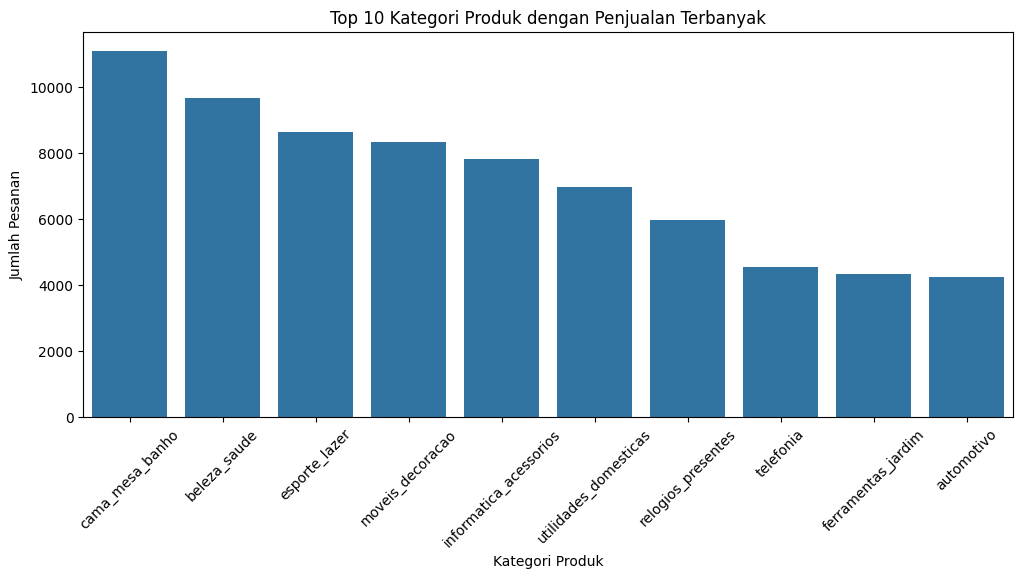

In [ ]:
# Gabungkan order_items dengan produk untuk mendapatkan kategori produk
merged = order_items.merge(products, on="product_id", how="left")

# Hitung jumlah pesanan per kategori
top_categories = merged['product_category_name'].value_counts().head(10)

# Visualisasi dengan bar chart
plt.figure(figsize=(12, 5))
sns.barplot(x=top_categories.index, y=top_categories.values)

# Menambahkan judul dan label
plt.title("Top 10 Kategori Produk dengan Penjualan Terbanyak")
plt.xlabel("Kategori Produk")
plt.ylabel("Jumlah Pesanan")
plt.xticks(rotation=45)

plt.show()


### Pertanyaan 2: Apa hubungan antara metode pembayaran dan jumlah transaksi?

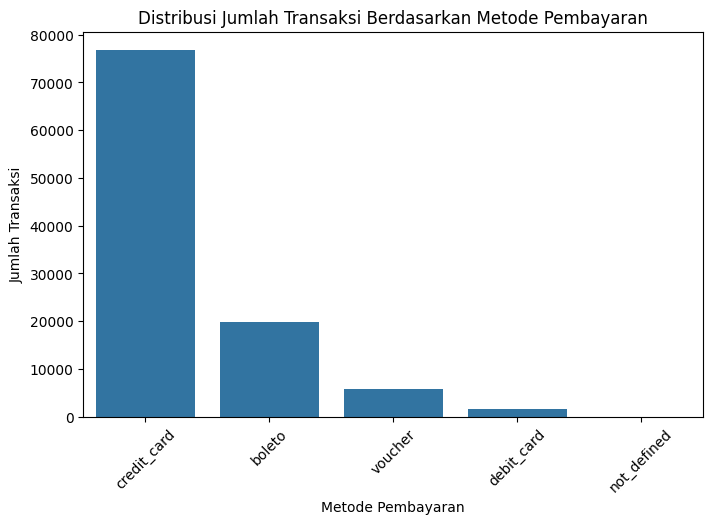

In [ ]:
# Hitung jumlah transaksi berdasarkan metode pembayaran

payments = pd.read_csv(os.path.join(dataset_path, "order_payments_dataset.csv"))

payment_counts = payments['payment_type'].value_counts()

# Visualisasi dengan bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_counts.index, y=payment_counts.values)

# Menambahkan judul dan label
plt.title("Distribusi Jumlah Transaksi Berdasarkan Metode Pembayaran")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)

plt.show()

**Insight:**
- **Pertanyaan 1**: Distribusi Jumlah Pesanan Berdasarkan Kategori Produk
Dari grafik, terlihat bahwa kategori "cama_mesa_banho" (peralatan tidur dan kamar mandi) memiliki jumlah pesanan tertinggi, diikuti oleh "beleza_saude" (kecantikan & kesehatan) dan "esporte_lazer" (olahraga & rekreasi). Ini menunjukkan bahwa pelanggan cenderung lebih banyak membeli produk-produk rumah tangga, perawatan diri, dan hobi. Kategori produk lain seperti "automotivo" (otomotif) dan "ferramentas_jardim" (peralatan & taman) memiliki jumlah pesanan yang lebih rendah, menandakan permintaan yang lebih spesifik atau terbatas. Insight ini dapat digunakan untuk strategi pemasaran, seperti meningkatkan stok atau promosi pada kategori dengan permintaan tinggi.

- **Pertanyaan 2**: Hubungan Metode Pembayaran dan Jumlah Transaksi
Mayoritas transaksi dilakukan menggunakan credit_card, diikuti oleh boleto sebagai metode pembayaran alternatif utama. Hal ini menunjukkan bahwa pelanggan lebih nyaman menggunakan kartu kredit, mungkin karena kemudahan cicilan atau faktor keamanan. Metode pembayaran lainnya seperti voucher dan debit_card memiliki jumlah transaksi yang jauh lebih sedikit, yang bisa disebabkan oleh keterbatasan penggunaan atau preferensi pelanggan yang lebih kuat terhadap dua metode utama. Dengan memahami pola ini, bisnis dapat menyesuaikan promosi atau memberikan insentif bagi pelanggan yang menggunakan metode pembayaran yang kurang populer untuk meningkatkan variasi pembayaran.

## Analisis Lanjutan (Opsional)

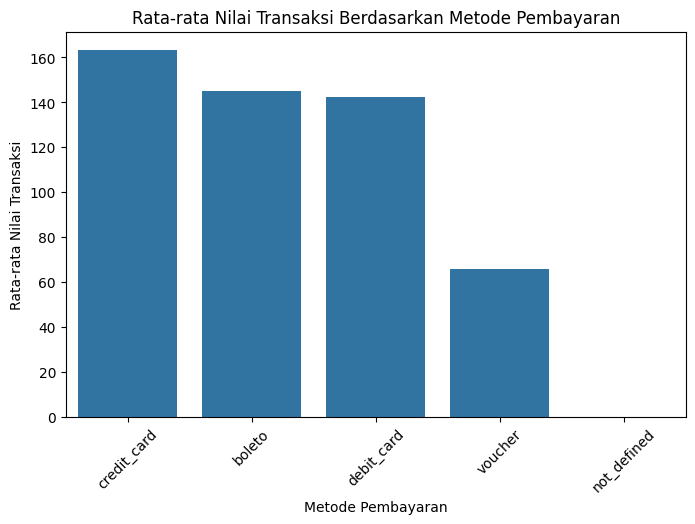

In [ ]:
#Analisis nilai rata rata transaksi
# Gabungkan order_payments dengan orders untuk mendapatkan nilai transaksi
payments = pd.read_csv(os.path.join(dataset_path, "order_payments_dataset.csv"))
orders = pd.read_csv(os.path.join(dataset_path, "orders_dataset.csv"))

# Hitung rata-rata nilai transaksi per metode pembayaran
avg_payment_value = payments.groupby('payment_type')['payment_value'].mean().sort_values(ascending=False)

# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_payment_value.index, y=avg_payment_value.values)

# Menambahkan judul dan label
plt.title("Rata-rata Nilai Transaksi Berdasarkan Metode Pembayaran")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Rata-rata Nilai Transaksi")
plt.xticks(rotation=45)

# Tampilkan grafik
plt.show()

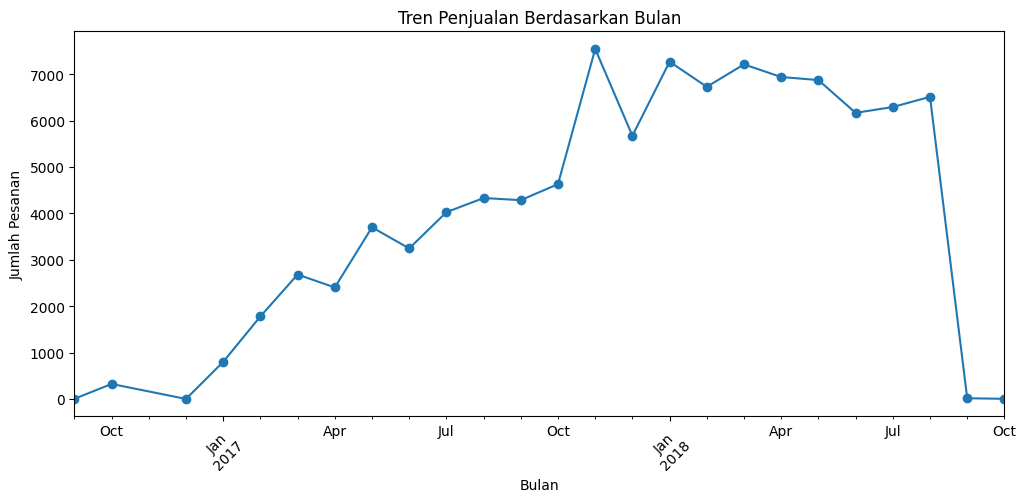

In [ ]:
#Tren penjualan berdasarkan bulan
# Konversi kolom order_purchase_timestamp menjadi format datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# Ambil bulan dan tahun dari tanggal pesanan
orders['month_year'] = orders['order_purchase_timestamp'].dt.to_period('M')

# Hitung jumlah pesanan per bulan
monthly_orders = orders['month_year'].value_counts().sort_index()

# Visualisasi
plt.figure(figsize=(12, 5))
monthly_orders.plot(kind='line', marker='o', linestyle='-')

# Menambahkan judul dan label
plt.title("Tren Penjualan Berdasarkan Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pesanan")
plt.xticks(rotation=45)

# Tampilkan grafik
plt.show()

- Dari analisis rata-rata nilai transaksi per metode pembayaran, kita bisa mengetahui metode pembayaran mana yang cenderung menghasilkan transaksi dengan nilai lebih tinggi. Ini bisa menjadi dasar untuk strategi promosi atau diskon.
- Dari tren penjualan per bulan, kita bisa mengidentifikasi pola musiman, misalnya apakah ada lonjakan penjualan saat akhir tahun atau selama event tertentu. Hal ini bisa membantu bisnis dalam mengatur stok dan strategi pemasaran.

In [ ]:
# Path dataset yang benar
dataset_path = "/content/E_Commerce_Public_Dataset/E-Commerce Public Dataset"
cleaned_data_path = "/content"  # Tempat file CSV yang sudah dibersihkan
output_path = "/content/E_Commerce_Public_Dataset"  # Lokasi penyimpanan main_data.csv

# Load dataset yang sudah dibersihkan
orders = pd.read_csv(os.path.join(cleaned_data_path, "orders_cleaned.csv"), parse_dates=[
    "order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date",
    "order_delivered_customer_date", "order_estimated_delivery_date"])
order_items = pd.read_csv(os.path.join(cleaned_data_path, "order_items_cleaned.csv"))
payments = pd.read_csv(os.path.join(cleaned_data_path, "order_payments_cleaned.csv"))
products = pd.read_csv(os.path.join(cleaned_data_path, "products_cleaned.csv"))
customers = pd.read_csv(os.path.join(cleaned_data_path, "customers_cleaned.csv"))
sellers = pd.read_csv(os.path.join(cleaned_data_path, "sellers_cleaned.csv"))
geolocation = pd.read_csv(os.path.join(cleaned_data_path, "geolocation_cleaned.csv"))
order_reviews = pd.read_csv(os.path.join(cleaned_data_path, "order_reviews_cleaned.csv"))

# ================== FITUR TAMBAHAN ================== #
# Tambahkan informasi waktu pengiriman (dalam hari)
orders['delivery_time'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

# Tambahkan informasi bulan dan hari pembelian
orders['purchase_month'] = orders['order_purchase_timestamp'].dt.to_period("M")
orders['purchase_dayofweek'] = orders['order_purchase_timestamp'].dt.day_name()

# ================== MERGE SEMUA DATASET ================== #
main_data = orders.merge(order_items, on="order_id", how="left") \
                  .merge(payments, on="order_id", how="left") \
                  .merge(products, on="product_id", how="left") \
                  .merge(customers, on="customer_id", how="left") \
                  .merge(sellers, on="seller_id", how="left") \
                  .merge(order_reviews, on="order_id", how="left")

# ================== SIMPAN DATA GABUNGAN ================== #
os.makedirs(output_path, exist_ok=True)  # Pastikan folder tersedia
main_data.to_csv(os.path.join(output_path, "main_data.csv"), index=False)

print("✅ File main_data.csv berhasil dibuat dengan semua dataset yang telah digabungkan!")

✅ File main_data.csv berhasil dibuat dengan semua dataset yang telah digabungkan!


In [ ]:
from tabulate import tabulate

# Load dataset yang sudah digabungkan
main_data_path = "/content/E_Commerce_Public_Dataset/main_data.csv"
main_data = pd.read_csv(main_data_path)

# Fungsi untuk menampilkan jumlah missing values dalam bentuk tabel
def check_missing_values(df):
    """
    Menampilkan jumlah missing values per kolom dalam bentuk tabel rapi.
    :param df: DataFrame yang ingin dicek
    """
    missing_values = df.isnull().sum().reset_index()
    missing_values.columns = ["Kolom", "Jumlah Missing"]
    missing_values = missing_values[missing_values["Jumlah Missing"] > 0]  # Hanya tampilkan kolom yang ada missing values

    if missing_values.empty:
        print("✅ Tidak ada missing values dalam dataset!")
    else:
        print("⚠️ Terdapat missing values pada beberapa kolom:\n")
        print(tabulate(missing_values, headers='keys', tablefmt='pretty'))

# Cek missing values pada dataset utama
check_missing_values(main_data)


⚠️ Terdapat missing values pada beberapa kolom:

+----+----------------------------+----------------+
|    |           Kolom            | Jumlah Missing |
+----+----------------------------+----------------+
| 11 |       order_item_id        |      833       |
| 12 |         product_id         |      833       |
| 13 |         seller_id          |      833       |
| 14 |    shipping_limit_date     |      833       |
| 15 |           price            |      833       |
| 16 |       freight_value        |      833       |
| 17 |     payment_sequential     |       3        |
| 18 |        payment_type        |       3        |
| 19 |    payment_installments    |       3        |
| 20 |       payment_value        |       3        |
| 21 |   product_category_name    |      833       |
| 22 |    product_name_lenght     |      833       |
| 23 | product_description_lenght |      833       |
| 24 |     product_photos_qty     |      833       |
| 25 |      product_weight_g      |      833      

In [ ]:
# Load dataset
dataset_hasil = "/content/E_Commerce_Public_Dataset"
file_path = os.path.join(dataset_hasil, "main_data.csv")
main_data = pd.read_csv(file_path)

# Konversi kolom waktu ke format datetime
cols_datetime = [
    "order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date",
    "order_delivered_customer_date", "order_estimated_delivery_date", "shipping_limit_date",
    "review_creation_date", "review_answer_timestamp"
]
for col in cols_datetime:
    main_data[col] = pd.to_datetime(main_data[col], errors='coerce')

# Mengisi nilai kosong dengan "unknown" untuk kategori
fill_unknown = [
    "product_category_name", "payment_type", "seller_city", "seller_state",
    "review_comment_title", "review_comment_message"
]
main_data[fill_unknown] = main_data[fill_unknown].fillna("unknown")

# Mengisi missing values dengan median untuk kolom numerik
fill_median = [
    "product_name_lenght", "product_description_lenght", "product_photos_qty", "product_weight_g",
    "product_length_cm", "product_height_cm", "product_width_cm", "review_score"
]
for col in fill_median:
    main_data[col].fillna(main_data[col].median(), inplace=True)

# Menghapus baris dengan nilai NaN di transaksi dan pembayaran yang penting
main_data.dropna(subset=[
    "order_item_id", "product_id", "seller_id", "shipping_limit_date", "price", "freight_value",
    "payment_sequential", "payment_installments", "payment_value", "review_id"
], inplace=True)

# Menangani anomali dalam waktu pengiriman (menghapus nilai negatif)
if 'delivery_time' in main_data.columns:
    main_data = main_data[main_data['delivery_time'] >= 0]

# Menangani harga dan pembayaran anomali
main_data = main_data[main_data['price'] > 0]
main_data = main_data[main_data['payment_value'] > 0]

# Simpan dataset yang sudah dibersihkan
cleaned_file_path = os.path.join(dataset_hasil, "cleaned_main_data.csv")
main_data.to_csv(cleaned_file_path, index=False)

# Cek hasil missing values setelah pembersihan
print("✅ Pembersihan Selesai! Cek Missing Values:")
print(main_data.isnull().sum())

<ipython-input-177-9ea3e1027b7f>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  main_data[col].fillna(main_data[col].median(), inplace=True)


✅ Pembersihan Selesai! Cek Missing Values:
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
delivery_time                    0
purchase_month                   0
purchase_dayofweek               0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_heig

## Conclusion

1. Distribusi Jumlah Pesanan Berdasarkan Kategori Produk
Berdasarkan analisis, kategori produk dengan jumlah pesanan terbanyak adalah "cama_mesa_banho", diikuti oleh "beleza_saude" dan "esporte_lazer". Hal ini menunjukkan bahwa pelanggan cenderung membeli produk terkait kebutuhan rumah tangga, kecantikan, dan olahraga dalam jumlah besar. Produk dekorasi rumah dan aksesori teknologi juga cukup populer. Insight ini dapat digunakan oleh penjual untuk mengoptimalkan stok dan strategi pemasaran, terutama untuk kategori yang paling diminati.

2. Hubungan Metode Pembayaran dan Jumlah Transaksi
Mayoritas transaksi dilakukan menggunakan kartu kredit, diikuti oleh metode boleto dan voucher. Hal ini mengindikasikan bahwa pelanggan lebih memilih metode pembayaran yang memberikan fleksibilitas, seperti cicilan kartu kredit. Sementara itu, metode seperti debit card memiliki jumlah transaksi yang jauh lebih sedikit, menunjukkan bahwa pelanggan cenderung menghindari pembayaran langsung dari saldo rekening mereka. Insight ini bisa dimanfaatkan oleh bisnis untuk menawarkan promosi atau diskon khusus berdasarkan metode pembayaran yang paling populer guna meningkatkan konversi penjualan.

**Membuat file requirements.txt deengan menggunakan pipreqs**

In [ ]:

drive.mount('/content/drive')
!pipreqs "/content/drive/MyDrive/Colab Notebooks/DBS/AnalisisData1/" --scan-notebooks #sesuaikan file nantinya akan di taruh di mana



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in /content/drive/MyDrive/Colab Notebooks/DBS/AnalisisData1/requirements.txt
